In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

In [18]:
2**12

4096

In [19]:
t = np.linspace(0,1,5_000)
y = ((np.cos(2*np.pi*t * 1000) + np.sin(2*np.pi*t * 8))*(2**12 - 1)).astype(int)

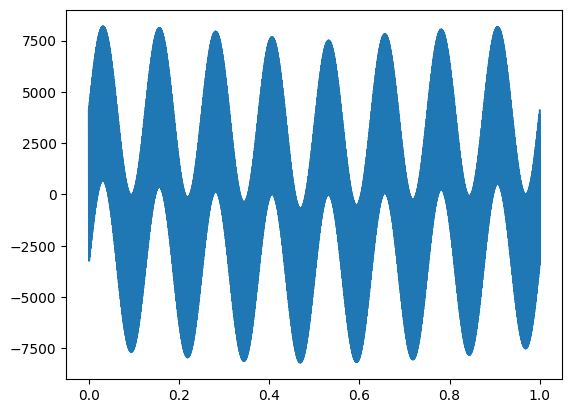

In [20]:
%matplotlib inline
plt.plot(t,y)

$$y_i = \alpha^2 x_i + 2(1-\alpha)y_{i-1} - (1-\alpha)^2 y_{i-2}$$

In [21]:
def lpf2(x, alpha):
    y = np.zeros(len(x))
    y[0] = 0
    y[1] = 0
    for i in range(2,len(x)):
        y[i] = alpha**2*x[i] + 2*(1-alpha)*y[i-1] - (1-alpha)**2 * y[i-2]
    return y

def lpf2_int(x, A, B):
    y = np.zeros(len(x))
    y[0] = A**2*x[0]//B**2
    y[1] = (A**2*x[1] + 2*B*(B-A)*y[0])//B**2
    for i in range(2,len(x)):
        y[i] = (A**2*x[i] + 2*B*(B-A)*y[i-1] - (B-A)**2 * y[i-2])//B**2
    return y

def lpf2_int2(x, A, B):
    y = np.zeros(len(x))
    #y[0] = A**2*x[0]//B**2
    #y[1] = (A**2*x[1] + 2*B*(B-A)*y[0])//B**2
    y[0] = 0
    y[1] = 0
    for i in range(2,len(x)):
        y[i] = (A**2*x[i] + 2*B*(B+A)*y[i-1] - B**2 * y[i-2])//(B+A)**2
    return y

def lpf2_int3(x, A, B):
    y = np.zeros(len(x))
    y[0] = 0
    y[1] = 0
    for i in range(2,len(x)):
        y[i] = A**2*x[i] + 2*(B-A)*y[i-1]//B - (B-A)**2 * y[i-2]//B**2
    return y//B**2

In [22]:
gamma = 8.0

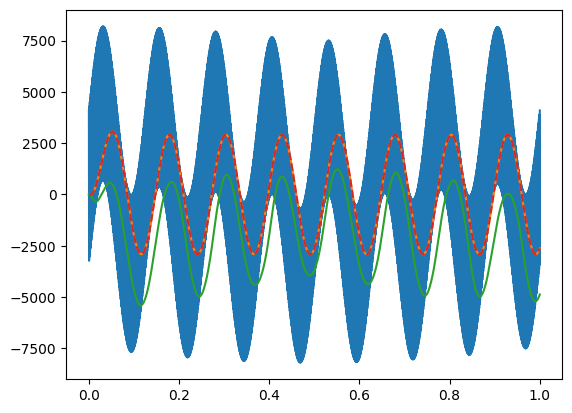

In [23]:
%matplotlib inline
plt.plot(t,y)
plt.plot(t,lpf2(y, 1/64))
plt.plot(t,lpf2_int(y, 1, 64))
plt.plot(t,lpf2_int3(y, 1, 64),'--')

Text(0.5, 0, '$f/f_\\mathrm{Nyquist}$')

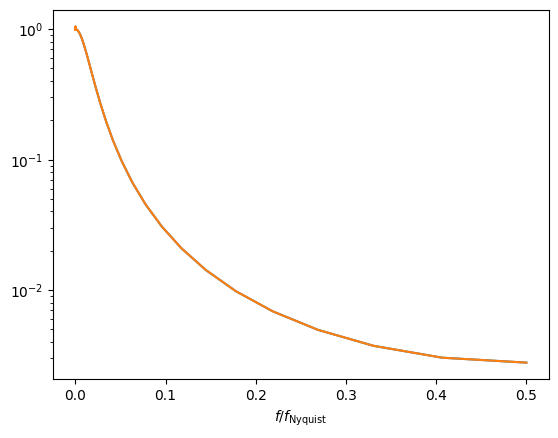

In [25]:
%matplotlib inline
NP = 50_000
ALPHA = 0.1

t = np.linspace(0,1, NP)

#b, a = scipy.signal.butter(4, 0.001)
b, a = scipy.signal.butter(4, 0.0075)

N=50
freqs = np.geomspace(1,NP/2,N)
resp, resp2 = np.zeros(N), np.zeros(N)
for i,f in enumerate(freqs):
    y = lpf2(np.sin(2*np.pi*f*t), ALPHA)
    resp[i] = np.sqrt(np.mean(y[len(y)//2::]**2))*np.sqrt(2)
    
    # y = lpf_ba(np.sin(2*np.pi*f*t), b, a)
    resp2[i] = np.sqrt(np.mean(y[len(y)//2::]**2))*np.sqrt(2)
    
#def h(a, omega):
#    return a**2/np.sqrt(1+4*(1-a)**2+(1-a)**4 + 2*(-2*(1-a) + (1-a)**2 - 2*(1-a)**3)*np.cos(omega))
    
plt.semilogy(freqs/NP, resp)
plt.semilogy(freqs/NP, resp2)
#plt.semilogy(freqs/NP, h(ALPHA, freqs/NP))
plt.xlabel("$f/f_\\mathrm{Nyquist}$")

In [ ]:
b, a = scipy.signal.bessel(3, 1, analog=True)
np.array(a)*15

array([15.        , 36.49321197, 36.99318111, 15.        ])

In [ ]:
import scipy.signal

In [ ]:
b, a= scipy.signal.butter(3, 0.5)
np.array(a)

array([ 1.00000000e+00, -2.77555756e-16,  3.33333333e-01, -1.85037171e-17])

In [ ]:
def lpf_test(x):
    y = np.zeros(len(x))
    y[0] = 0
    y[1] = 0
    for i in range(2,len(x)):
        y[i] = 0.29289322*x[i] + 0.58578644*x[i-1] + 0.29289322*x[i-2] + 1.71572875e-01 * y[i-2]
    return y

def lpf_ba(x, b, a):
    y = np.zeros(len(x))
    order = len(b)
    y[0] = 0
    y[1] = 0
    for i in range(order,len(x)):
        for j in range(0,order):
            y[i] = y[i] + x[i-j]*b[j]
        for j in range(1,order):
            y[i] = y[i] - y[i-j]*a[j]
    return y

In [26]:
t = np.linspace(0,1,10_000)
y = np.cos(2*np.pi*t * 1000) + np.sin(2*np.pi*t * 8)

In [27]:
%matplotlib widget

b, a = scipy.signal.butter(2, 0.001)

plt.plot(t,y)
#plt.plot(t, scipy.signal.lfilter(b, a, y))
plt.plot(t,lpf_ba(y, b, a))
#plt.ylim(-2**14,2**14)

ModuleNotFoundError: No module named 'ipympl'

In [ ]:
n_bits = 28

b, a = scipy.signal.butter(4, 0.0075)
print((b*2**n_bits).astype(int))
print((a*2**n_bits).astype(int))

[ 5 20 30 20  5]
[  268435456 -1057214350  1561537209 -1025164133   252405898]


In [ ]:
def lpf_test(x):
    y = np.zeros(len(x)).astype(int)
    y[0] = 0
    y[1] = 0
    for i in range(2,len(x)):
        #print(5*x[i] + 10*x[i-1] + 5*x[i-2] - 399*y[i-1] + 164*y[i-2])
        y[i] = (5*x[i] + 10*x[i-1] + 5*x[i-2] + 399*y[i-1]//2**8 - 164*y[i-2]//2**8)
    return y//2**8


In [ ]:
b,a

(array([0.29289322, 0.58578644, 0.29289322]),
 array([ 1.00000000e+00, -1.66533454e-16,  1.71572875e-01]))

In [ ]:
np.log2(6.63518679e-17)

-53.74264053298879

In [ ]:
def lpf_ba_int(x, b_float, a_float, n_bits):
    a=(a_float*2**n_bits).astype(np.int64)
    b=(b_float*2**n_bits).astype(np.int64)
    
    
    y = np.zeros(len(x)).astype(np.int64)
    order = len(b)
    y[0] = 0
    y[1] = 0
    ymax = 0;
    for i in range(order,len(x)):
        for j in range(0,order):
            y[i] = y[i] + x[i-j]*b[j]
        for j in range(1,order):
            y[i] = y[i] - y[i-j]*a[j]//2**n_bits
            ymax = max(ymax, abs(y[i-j]*a[j]))
    print(ymax)
    return y//2**n_bits

def lpf_ba_int_arbprec(x, b_float, a_float, n_bits):
    a=(a_float*2**n_bits).astype(np.int64)
    b=(b_float*2**n_bits).astype(np.int64)
    
    print("Computation needs %d bits" % (np.ceil(np.max(np.log2(np.abs(a))) + n_bits + 14)))
    
    order = len(b)
    y = [0]*order
    ymax = 0;
    for i in range(order,len(x)):
        y.append(0)
        for j in range(0, order):
            y[i] = y[i] + int(x[i-j])*int(b[j])
        for j in range(1,order):
            y[i] = y[i] - int(y[i-j])*int(a[j])//2**n_bits
            ymax = max(ymax, abs(int(y[i-j])*int(a[j])))
    print(ymax)
    for i in range(0,len(y)):
        y[i] = y[i] // 2**n_bits
    return y

Computation needs 73 bits
1715521277329665421845


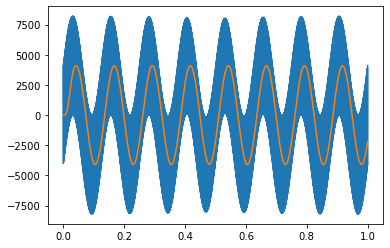

In [ ]:
t = np.linspace(0,1,10_000)
y = ((np.cos(2*np.pi*t * 1000) + np.sin(2*np.pi*t * 8))*(2**12 - 1)).astype(int)

b, a = scipy.signal.butter(4, 0.0075)

plt.plot(t,y)
plt.plot(t,lpf_ba_int_arbprec(y, b, a, 28))
#plt.plot(t,lpf_test(y))

In [ ]:
73-14+27

86

In [ ]:
1/.0075

133.33333333333334

In [ ]:
2**6

64

In [ ]:
125e6/133/2**6

14685.15037593985